# Goal: Determine whether Ethiopia's beta distributions are causing us to get negative averted results

First, I need to take care of an annoying Python issue so that I don't have to keep copying code...


## 1. Add the `vivarium_data_analysis` directory to the Python path `sys.path` so that I can import modules from other folders in the vivarium data analysis repo

See these posts:

1. https://stackoverflow.com/questions/32152978/importing-modules-from-multiple-parallel-subdirectories-python/32153241
2. https://stackoverflow.com/questions/9153527/import-module-in-another-directory-from-a-parallel-sub-directory
3. https://gist.github.com/JungeAlexander/6ce0a5213f3af56d7369
3. http://python-notes.curiousefficiency.org/en/latest/python_concepts/import_traps.html
4. https://docs.python.org/3/tutorial/modules.html

Note that the solution below makes any modules in the current dirctory accessible in two different ways -- e.g. `import lsff_plots` and `import plots_and_other_misc.lsff_plots` should both work. According to the "import traps" link above, this should be avoided (perhaps one workaround would be to remove `''` from `sys.path`, forcing all local imports to specify the subfolder of `vivarium_data_analysis`?).

A better solution would be to make `vivarium_data_analysis` into an actual package that can be `pip install`ed, but I don't know how to do that - we should get help from the SWE's.

In [1]:
import sys
import os.path
!whoami
!date

ndbs
Fri Sep 18 17:31:54 PDT 2020


In [2]:
sys.path

['/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python36.zip',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/lib-dynload',
 '',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/site-packages',
 '/ihme/homes/ndbs/vivarium_conic_lsff/src',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/site-packages/IPython/extensions',
 '/ihme/homes/ndbs/.ipython']

In [3]:
# current directory
!pwd

/ihme/homes/ndbs/vivarium_data_analysis/plots_and_other_misc


In [4]:
# I want to import the prob_utils module from the probability directory
!ls ../probability/

2020_03_23a_coverage_distributions.ipynb  prob_utils.py
coverage_india_nigeria.svg		  __pycache__


In [5]:
# # But the following import fails with:
# # ModuleNotFoundError: No module named 'probability'

# from probability import prob_utils

# # The solution is to add the `vivarium_data_analysis` directory to `sys.path`

In [6]:
# Get the absolute path of the current parent directory
os.path.abspath("..")

'/ihme/homes/ndbs/vivarium_data_analysis'

In [7]:
# Add the parent directory to sys.path so we can access subfolders
sys.path.append(os.path.abspath(".."))
sys.path

['/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python36.zip',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/lib-dynload',
 '',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/site-packages',
 '/ihme/homes/ndbs/vivarium_conic_lsff/src',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/site-packages/IPython/extensions',
 '/ihme/homes/ndbs/.ipython',
 '/ihme/homes/ndbs/vivarium_data_analysis']

In [8]:
# Now we can import the prob_utils module from the file
# /ihme/homes/ndbs/vivarium_data_analysis/probability/prob_utils.py'
# using the import statement that previously failed:
from probability import prob_utils

### Summary of above steps to get this to work

Note: If the directory structure changes, ".." would have to be replaced with the appropriate directory

In [9]:
# import sys
# import os.path

# sys.path.append(os.path.abspath(".."))
# from probability import prob_utils

## 2. Do other imports and set up auto-reloading of modules so I can edit the `.py` files as I work

In [10]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy import stats
from plots_and_other_misc import lsff_plots

In [11]:
%load_ext autoreload
%autoreload 2

## 3. Import the coverage data

In [12]:
coverage_dfs = lsff_plots.get_coverage_dfs()
flour_df, oil_df = coverage_dfs['flour'], coverage_dfs['oil']
flour_df.T

eats_fortified                 eats_fortifiable          \
                            mean   lower   upper             mean   lower   
Ethiopia                   1.000   0.000  10.000             15.0  10.000   
India (Rajasthan)          6.300   4.800   7.900              7.1   5.600   
Nigeria (Kano)            22.700  20.000  25.500             83.8  81.400   
Nigeria (Lagos)            5.400   3.800   6.900             13.8  11.500   
India                      6.300   4.800   7.900              7.1   5.600   
Nigeria                    8.168   6.392   9.876             25.0  22.684   

                          eats_vehicle                  
                    upper         mean   lower   upper  
Ethiopia           20.000       28.000  23.000  33.000  
India (Rajasthan)   9.100       83.200  79.500  86.500  
Nigeria (Kano)     86.200       83.900  81.500  86.300  
Nigeria (Lagos)    16.100       14.200  11.800  16.500  
India               9.100       83.200  79.500  86.500  
Nigeria            27.316       25.352  22.952  27.668

In [13]:
oil_df.T

eats_fortified                eats_fortifiable          \
                            mean   lower  upper             mean   lower   
Ethiopia                   1.000   0.000  10.00           44.000  34.000   
India (Rajasthan)         24.300  21.100  27.90           89.400  87.000   
Nigeria (Kano)             7.600   5.900   9.40           35.900  32.700   
Nigeria (Lagos)            7.200   5.500   8.90           22.700  19.900   
India                     24.300  21.100  27.90           89.400  87.000   
Nigeria                    7.264   5.564   8.98           24.812  21.948   

                          eats_vehicle                  
                    upper         mean    lower  upper  
Ethiopia           54.000       55.000   45.000   65.0  
India (Rajasthan)  91.800      100.000  100.000  100.0  
Nigeria (Kano)     39.100       98.400   97.600   99.3  
Nigeria (Lagos)    25.500       98.600   97.800   99.3  
India              91.800      100.000  100.000  100.0  
Nigeria            27.676       98.568   97.768   99.3

## 4. Plot the density and distribution of Ethiopia's oil coverage parameter $a$

And check a few things about the Beta distribution for $a$.

Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html

In [14]:
ethiopia_a_dist = stats.beta(0.1,9.9)

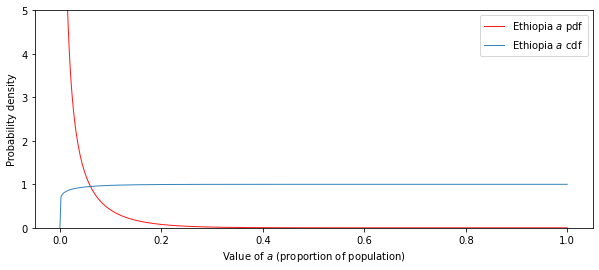

In [15]:
fig, ax = plt.subplots(figsize = (10,4))

x = np.linspace(0,1, 500)
ax.plot(x, ethiopia_a_dist.pdf(x), 'r-', lw=1, alpha=0.9, label=r'Ethiopia $a$ pdf')
ax.plot(x, ethiopia_a_dist.cdf(x), lw=1, alpha=0.9, label=r'Ethiopia $a$ cdf')

ax.set_ylim(0,5)
ax.legend()
ax.set_xlabel(r'Value of $a$ (proportion of population)')
ax.set_ylabel('Probability density')

plt.show()

In [16]:
# Show the 95% confidence interval for a:
# Amazingly, this is surprisingly close to the confidence intervel of (0.0, 0.10) that I made up!
ethiopia_a_dist.interval(0.95)

(6.125969082943768e-18, 0.09822655608111423)

In [17]:
# See how likely it is that a>.44 (the lower endpoint for b for oil):
# It's a pretty small chance, which is a good sign.
ethiopia_a_dist.sf(0.44)

8.154535365834104e-05

In [18]:
# See how likely it is that a>b_lower, a>b_mean, and a>b_upper for flour:
# These are a bit more concerning, as they're not negligibly small...
# But we need to do more work to figure out the actual probability that a>b.
ethiopia_a_dist.sf([0.10, 0.15, 0.20])

array([0.02426191, 0.0107513 , 0.00488836])

## 5. Generate distributions for all 3 Ethiopia parameters from the coverage dataframe(s)

First, test some stuff out...

In [19]:
oil_df

Ethiopia  India (Rajasthan)  Nigeria (Kano)  \
eats_fortified   mean          1               24.3             7.6   
                 lower         0               21.1             5.9   
                 upper        10               27.9             9.4   
eats_fortifiable mean         44               89.4            35.9   
                 lower        34               87.0            32.7   
                 upper        54               91.8            39.1   
eats_vehicle     mean         55              100.0            98.4   
                 lower        45              100.0            97.6   
                 upper        65              100.0            99.3   

                        Nigeria (Lagos)  India  Nigeria  
eats_fortified   mean               7.2   24.3    7.264  
                 lower              5.5   21.1    5.564  
                 upper              8.9   27.9    8.980  
eats_fortifiable mean              22.7   89.4   24.812  
                 lower             19.9   87.0   21.948  
                 upper             25.5   91.8   27.676  
eats_vehicle     mean              98.6  100.0   98.568  
                 lower             97.8  100.0   97.768  
                 upper             99.3  100.0   99.300

In [20]:
# Figure out how to conveniently index mean, upper, and lower for each parameter
idx = pd.IndexSlice
oil_df.loc[idx['eats_fortifiable', :], 'Ethiopia']

eats_fortifiable  mean     44
                  lower    34
                  upper    54
Name: Ethiopia, dtype: int64

In [21]:
# We can also use tuples to get the stats individually
mean = oil_df.loc[('eats_fortifiable', 'mean'), 'Ethiopia'] / 100
upper = oil_df.loc[('eats_fortifiable', 'upper'), 'Ethiopia'] / 100
print(mean, upper)

0.44 0.54


In [22]:
# Create beta distribution for Ethiopia 'b' parameter for oil
ethiopia_oil_b_dist = prob_utils.beta_from_mean_approx_quantile(mean, upper, 0.975)

In [23]:
# List distribution object's attributes to see if we can recover alpha and beta
# (See https://stackoverflow.com/questions/2675028/list-attributes-of-an-object )
#
# Yes, alpha and beta are stored in 'args'
ethiopia_oil_b_dist.__dict__

{'args': (41.2075599504374, 52.44598539146579),
 'kwds': {},
 'dist': <scipy.stats._continuous_distns.beta_gen at 0x2b889db3cac8>,
 'a': 0.0,
 'b': 1.0}

In [24]:
# If we have the distribution object, we can later access the
# parameters to see what alpha and beta were, e.g. to print them
#(i.e. we don't need to store these somewhere else once we create the distribution)
ethiopia_oil_b_dist.args

(41.2075599504374, 52.44598539146579)

### Write a function to generate the distributions from the coverage dataframe

In [25]:
def get_ethiopia_coverage_distributions(coverage_df, fortified_alpha = 0.1, fortified_beta = 9.9):
    """Return a dictionary mapping the coverage level to the appropriate beta distribution"""
    
    # # This gets the coverage levels from the df, but maybe it's clearer to list them explicitly
    # coverage_levels = coverage_df.index.get_level_values(0).drop_duplicates()
    coverage_levels = ['eats_fortified', 'eats_fortifiable', 'eats_vehicle']
    
    distributions = {coverage_levels[0]: stats.beta(fortified_alpha, fortified_beta)}
    
    for coverage_level in coverage_levels[1:]:
        mean = coverage_df.loc[(coverage_level, 'mean'), 'Ethiopia'] / 100
        upper = coverage_df.loc[(coverage_level, 'upper'), 'Ethiopia'] / 100
        distributions[coverage_level] = prob_utils.beta_from_mean_approx_quantile(mean, upper, 0.975)
        
    return distributions

In [26]:
oil_dists = get_ethiopia_coverage_distributions(oil_df)

# This should be the same as alpha and beta for ethiopia_b_dist above
oil_dists['eats_fortifiable'].args

(41.2075599504374, 52.44598539146579)

## 6. Write some code to find the intersection between two curves

Based on code from these two posts:

https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value

https://stackoverflow.com/questions/46909373/how-to-find-the-exact-intersection-of-a-curve-as-np-array-with-y-0/

Similar to the second example, I will have a function `find_roots(x,y)` that finds the zeros of a function, but I will use the simple left-hand approximation in the first example rather than doing a linear interpolation as in the second example (which threw a divide-by-zero error since my y-values are so small).

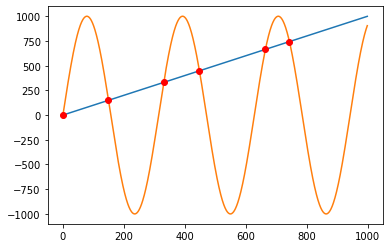

In [27]:
def plot_intersections():
    """
    Example of plotting the intersection points of two graphs.
    
    Copied from:
    https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value
    
    "You can use np.sign in combination with np.diff and np.argwhere
    to obtain the indices of points where the lines cross
    (in this case, the points are idx = [  0, 149, 331, 448, 664, 743]):"
    """
    x = np.arange(0, 1000)
    f = np.arange(0, 1000)
    g = np.sin(np.arange(0, 10, 0.01) * 2) * 1000

    plt.plot(x, f, '-')
    plt.plot(x, g, '-')

    idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
#     print(idx)
    plt.plot(x[idx], f[idx], 'ro')
    plt.show()
    
plot_intersections()

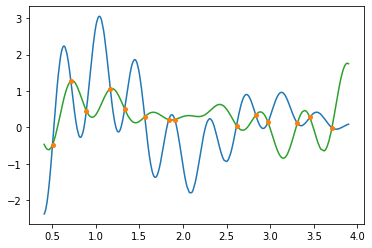

In [28]:
def plot_intersections_interpolated(seed=None):
    """
    Copied from:
    https://stackoverflow.com/questions/46909373/how-to-find-the-exact-intersection-of-a-curve-as-np-array-with-y-0/
    
    This version uses simple linear interpolation between the x values where y switches from positive to negative.
    """
    def find_roots(x,y):
        # s = np.abs(np.diff(np.sign(y))).astype(bool)
        # This gives the indices where the above array is True
        s = np.argwhere(np.diff(np.sign(y))).flatten()
        # The root occurs between x[s] and x[s+1]; estimate its location using linear interpolation as
        # x[s] + delta_x, where delta_x = [(x[s+1]-x[s])/(y[s+1]-y[s])]*delta_y, and delta_y=(0-y[s]).
        return x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1)
    
    if seed is not None:
        np.random.seed(seed)
        
    N = 750
    x = .4 + np.sort(np.random.rand(N)) * 3.5
    y1 = (x - 4) * np.cos(x * 9.) * np.cos(x * 6 + 0.05) + 0.1
    y2 = (x - 2) * np.cos(x * 8.) * np.cos(x * 5 + 0.03) + 0.3

    z = find_roots(x,y2-y1)

    plt.plot(x,y1)
    plt.plot(x,y2, color="C2")
    # np.interp(z, x, y1) estimates the value of y1 at z by linearly interpolating between the data points (x,y1)
    plt.plot(z, np.interp(z, x, y1), marker="o", ls="", ms=4, color="C1")
    
plot_intersections_interpolated(0)

## 7. Write functions to plot densities and distribution functions for all 3 Ethiopia parameters and to find where the CDFs intersect

In [29]:
def find_roots(x,y):
    """
    Returns the approxmiate values of x where y=0 (x and y are arrays of the same length).
    The estimates will be biased to the left because the function returns each of the last
    x values encountered before y changes sign. See demonstration below.
    To improve accuracy, use x values that are spaced close together.
    
    Based on:
    https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value
    https://stackoverflow.com/questions/46909373/how-to-find-the-exact-intersection-of-a-curve-as-np-array-with-y-0/
    """
    idx = np.argwhere(np.diff(np.sign(y))).flatten()
    return x[idx] # The returned x-value will be slightly to the left of the root
#     return x[:-1][idx] + np.diff(x)[idx]/(np.abs(y[1:][idx]/y[:-1][idx])+1) # This threw a divide-by-zero error

In [30]:
def demonstrate_find_roots():
    """Shows how the `find_roots` function works."""
    x = np.linspace(0,7, 5)
    y = np.sin(x)
    print('(x,y) pairs:', list(zip(x,y.round(3))))
    print('sgn(y):', np.sign(y))
    print('diff of signs:', np.diff(np.sign(y)))
    print('left indices of sign changes:', np.argwhere(np.diff(np.sign(y))).flatten())
    print('approximate roots:', find_roots(x,y))
    
demonstrate_find_roots()

(x,y) pairs: [(0.0, 0.0), (1.75, 0.984), (3.5, -0.351), (5.25, -0.859), (7.0, 0.657)]
sgn(y): [ 0.  1. -1. -1.  1.]
diff of signs: [ 1. -2.  0.  2.]
left indices of sign changes: [0 1 3]
approximate roots: [0.   1.75 5.25]


In [31]:
def plot_coverage_distributions(vehicle, coverage_distributions):
    """
    Plots the coverage distributions in the `coverage_distributions` dictionary,
    using `vehicle` in the title of the plot.
    Also plots the first nontrivial intersection point between the CDFs of and b and of a and c,
    and prints information about the displayed distributions.
    """
    fig, axs = plt.subplots(3, 1, figsize = (10,8))

    x = np.linspace(0,1, 500)
    
    short_names = {'eats_fortified': 'a', 'eats_fortifiable': 'b', 'eats_vehicle': 'c'}

    for c, dist in coverage_distributions.items():
        
        # Print parameters for the distributions for easy comparison
        print(f'{c} ({short_names[c]}): mean={dist.mean():.3f}, var={dist.var():.6f}, (alpha,beta)={dist.args}')
        
        pdf_kwargs = dict(lw=1, alpha=0.9, label=f'PDF for {short_names[c]} ({c})')
        cdf_kwargs = dict(lw=1, alpha=0.9, label=f'CDF for {short_names[c]} ({c}))')
        
        axs[0].plot(x, dist.pdf(x), **pdf_kwargs)
        axs[1].plot(x, dist.cdf(x), **cdf_kwargs)
        axs[2].plot(x, dist.cdf(x), **cdf_kwargs)
    
    # Use a logit scale for the 3rd plot, and restrict y to the interesting part
    axs[2].set_yscale('logit')
    axs[2].set_ylim(1e-4,1-1e-11)
    
    # Label the x and y axes of the 3rd plot
    axs[2].set_xlabel(r'value of $a$, $b$, or $c$ (proportion of population)', size=15)
    axs[2].set_ylabel(r'probability $p$ on logit scale' '\n' r'$y=\log(\,p\,/\,(1-p)\,)$')
    
    # Label the y axes of the first two plots (don't label x axes)
    axs[0].set_ylabel('probability density')
    axs[1].set_ylabel(r'probability $p$')
    
    # Add the intersection points to plots 2 and 3, and print them
    plot_intersection_points(axs[1:], coverage_distributions, True)
    
    # Put a title on 1st plot
    axs[0].set_title(f'{vehicle.capitalize()} coverage parameter distributions for Ethiopia', size=18)
    
    # Add legends to the 3 plots
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    
    fig.tight_layout()
    
def plot_intersection_points(axs, coverage_distributions, print_coordinates):
    """
    Plots the intersection points between the CDFs of a and b and of a and c on the specified axes.
    Also prints the coordinates of the intersection points if `print_coordinates` is True.
    """
    # The spacing between x values determines the accuracy of the roots found by find_roots()
    x = np.linspace(0,1, 1000)
    
    # Define short names for the CDF's of a, b, and c
    f = coverage_distributions['eats_fortified'].cdf
    g = coverage_distributions['eats_fortifiable'].cdf
    h = coverage_distributions['eats_vehicle'].cdf
    
    # Find where f intersects g and h by finding the zeros of their differences
    zfg = find_roots(x, f(x)-g(x))
    zfh = find_roots(x, f(x)-h(x))
    
    if print_coordinates:
        print('a,b intersections:', list(zip(zfg, f(zfg))))
        print('a,c intersections:', list(zip(zfh, f(zfh))))
    
    # Find the first root that's positive (there's also one at 0 and one at (or near) 1)
    zfg = zfg[1]
    zfh = zfh[1]

    # Define styles and labels for the intersection points
    intersection_kwargs = dict(marker="o", linestyle="", markersize=6)
    ab_kwargs = dict(**intersection_kwargs, label=f"a=b={zfg:.4f} when p={f(zfg):.4f}")
    ac_kwargs = dict(**intersection_kwargs, label=f"a=c={zfh:.4f} when p={f(zfh):.4f}")
    
    # Plot the intersection points on the passed axes
    for ax in axs:
        ax.plot(zfg, f(zfg), **ab_kwargs)
        ax.plot(zfh, f(zfh), **ac_kwargs)

## 8. Plot densities and distribution functions for all 3 Ethiopia parameters for flour and oil

Based on the plots and the intersection points, we can calculate the following probabilities of the parameters being out of order when we use the comonotone coupling (i.e. when each parameter has the same percentile rank).

For the flour parameters:

* $P(a>b) \approx 0.0032$, so there is about one in 309 chance that $a>b$.
* $P(a>c) \approx 0.0003$, so there is about one in 3500 chance that $a>c$.

For the oil parameters, there is still a positive probability that $a>b$ or $a>c$, but it is negligibly small.

eats_fortified (a): mean=0.010, var=0.000900, (alpha,beta)=(0.1, 9.9)
eats_fortifiable (b): mean=0.150, var=0.000651, (alpha,beta)=(29.237159978310032, 165.6772398770902)
eats_vehicle (c): mean=0.280, var=0.000651, (alpha,beta)=(86.45706700421684, 222.31817229655755)
a,b intersections: [(0.0, 0.0), (0.22622622622622623, 0.9967670149984896), (0.95995995995996, 0.9999999999999998)]
a,c intersections: [(0.0, 0.0), (0.37237237237237236, 0.9997145001118859), (0.95995995995996, 0.9999999999999998)]


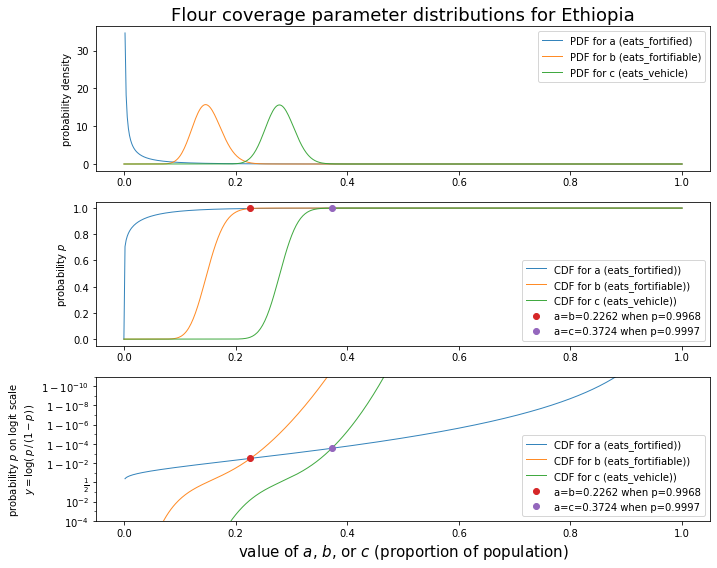

In [32]:
flour_dists = get_ethiopia_coverage_distributions(flour_df)
plot_coverage_distributions('flour', flour_dists)

In [33]:
# Calculate how likely it is that a>b or a>c, using the comonotone coupling of a,b,c for flour
# (probabilities copied from the y-values of the intersection points above)
p1=0.9967670149984896 # P(a<b)
p2=0.9997145001118859 # P(a<c)
print('probability of a>b for flour:', 1-p1, '; chances: 1 in', 1/(1-p1))
print('probability of a>c for flour:', 1-p2, '; chances: 1 in', 1/(1-p2))

probability of a>b for flour: 0.003232985001510369 ; chances: 1 in 309.3116731233907
probability of a>c for flour: 0.00028549988811410465 ; chances: 1 in 3502.6283428886454


eats_fortified (a): mean=0.010, var=0.000900, (alpha,beta)=(0.1, 9.9)
eats_fortifiable (b): mean=0.440, var=0.002603, (alpha,beta)=(41.2075599504374, 52.44598539146579)
eats_vehicle (c): mean=0.550, var=0.002603, (alpha,beta)=(51.7418581966988, 42.334247615480834)
a,b intersections: [(0.0, 0.0), (0.6966966966966966, 0.9999998680045248), (0.95995995995996, 0.9999999999999998)]
a,c intersections: [(0.0, 0.0), (0.8228228228228228, 0.9999999994356928), (0.95995995995996, 0.9999999999999998)]


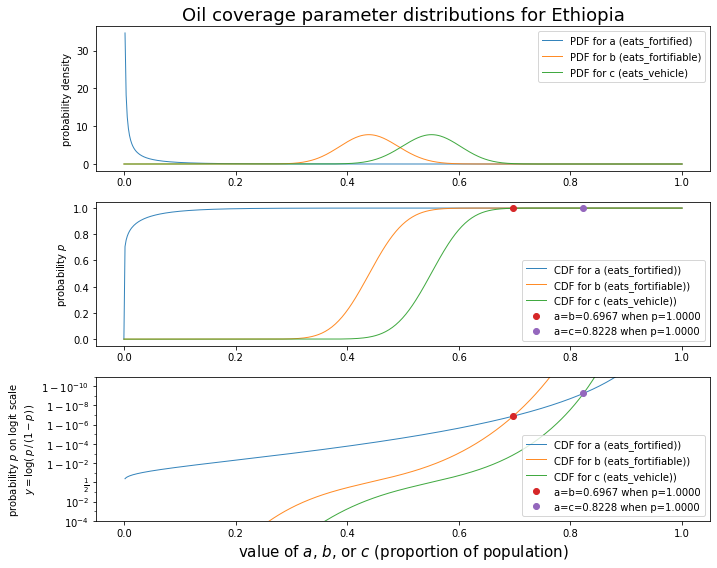

In [34]:
oil_dists = get_ethiopia_coverage_distributions(oil_df)
plot_coverage_distributions('oil', oil_dists)

## 9. Try different $\alpha$ and $\beta$ for flour parameter $a$

Here are the $\alpha$ and $\beta$ for all 3 flour parameters, as output above:

```
eats_fortified (a): mean=0.010, var=0.000900, (alpha,beta)=(0.1, 9.9)
eats_fortifiable (b): mean=0.150, var=0.000651, (alpha,beta)=(29.237159978310032, 165.6772398770902)
eats_vehicle (c): mean=0.280, var=0.000651, (alpha,beta)=(86.45706700421684, 222.31817229655755)
```

To keep the CDF of $a$ above the CDFs of $b$ and $c$, let's try choosing $\beta$ for $a$ to be larger than the $\beta$ for $b$ and $c$, e.g. $\beta=230$. With a larger $\beta$, we can also probably make $\alpha$ larger than 0.1 (but $\le 1$ to keep the mode at 0) if we want, in order to adjust the mean.

eats_fortified (a): mean=0.002, var=0.000009, (alpha,beta)=(0.5, 230)
eats_fortifiable (b): mean=0.150, var=0.000651, (alpha,beta)=(29.237159978310032, 165.6772398770902)
eats_vehicle (c): mean=0.280, var=0.000651, (alpha,beta)=(86.45706700421684, 222.31817229655755)
a,b intersections: [(0.0, 0.0), (0.4184184184184184, 0.9999999999999999)]
a,c intersections: [(0.0, 0.0), (0.5075075075075075, 0.9999999999999999)]
eats_fortified (a): mean=0.005, var=0.000049, (alpha,beta)=(0.5, 100)
eats_fortifiable (b): mean=0.150, var=0.000651, (alpha,beta)=(29.237159978310032, 165.6772398770902)
eats_vehicle (c): mean=0.280, var=0.000651, (alpha,beta)=(86.45706700421684, 222.31817229655755)
a,b intersections: [(0.0, 0.0), (0.4184184184184184, 0.9999999999999999)]
a,c intersections: [(0.0, 0.0), (0.5075075075075075, 0.9999999999999999)]


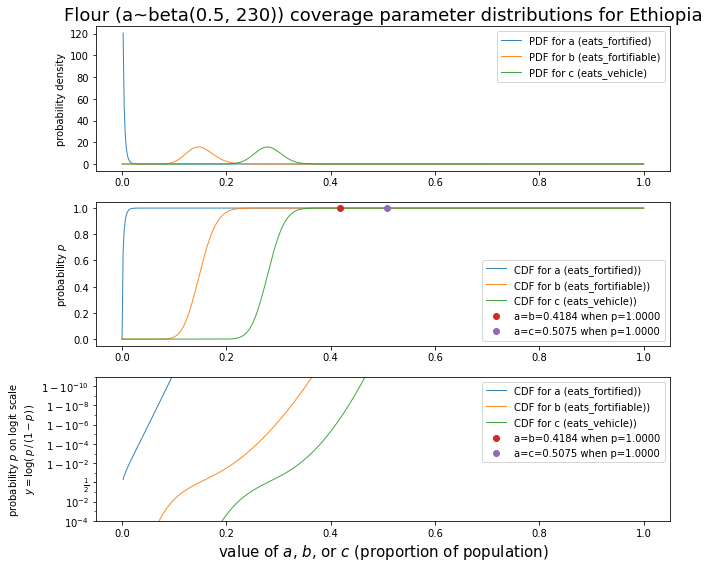

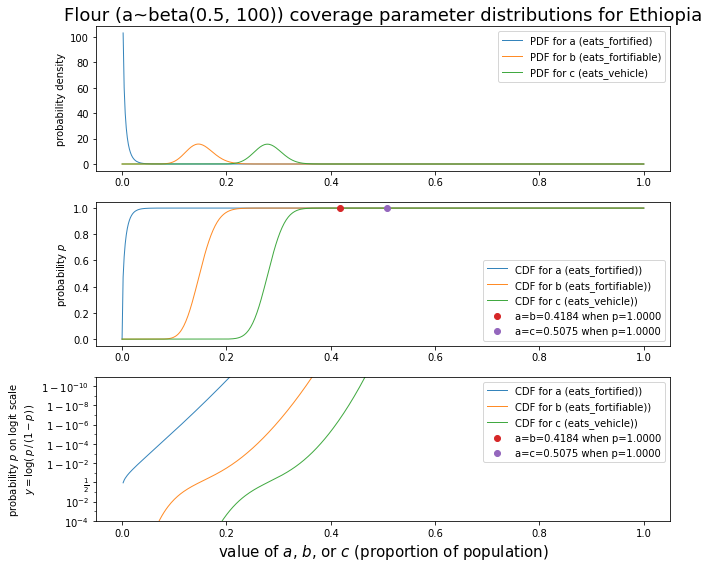

In [35]:
# Choose different values for the fortified alpha and beta, and plot them
ab_pairs = [(0.5,230), (0.5, 100)]

for fortified_alpha, fortified_beta in ab_pairs:
    new_flour_dists = get_ethiopia_coverage_distributions(flour_df, fortified_alpha, fortified_beta)
    plot_coverage_distributions(f'flour (a~beta({fortified_alpha}, {fortified_beta}))', new_flour_dists)

In [36]:
# Calculate the mean and 95% interval directly from alpha and beta
alpha = 0.5
beta = 230
print(alpha / (alpha+beta))
print(stats.beta.interval(0.95, alpha, beta))

0.0021691973969631237
(2.137252418093714e-06, 0.010873806571157133)


In [37]:
# find the mean, variance and 95% confidence interval for the new 'a' distribution
new_a_dist = new_flour_dists['eats_fortified']
print('(alpha,beta):', new_a_dist.args)
print('mean:', new_a_dist.mean())
print('var:', new_a_dist.var())
print('95% interval:', new_a_dist.interval(.95))

(alpha,beta): (0.5, 100)
mean: 0.004975124378109453
var: 4.877214301016546e-05
95% interval: (4.922624634972965e-06, 0.024867749237206586)


### Takeaways from above plots

The above graphs show that setting $\beta=230$ gets rid of the intersections -- the intersection points that remain occur when the CDFs are numerically indistinguishable from 1.0.

It also looks like we can make $\beta$ smaller (e.g. 100) and it still works -- the intersections occur at the same place as with $\beta=230$, so my guess is that these points are where the CDFs for $b$ and $c$ hit 1 (up to floating point precision), and that the CDF for $a$ has already hit 1 prior to when this happens.